## 常用分布

### np.random.normal(0,1,1000) / np.random.normal(mu, sigma, 1000)
### np.random.randint(1, 7) # 1-6 as dice roll
### np.random.choice(values, p=probs) / np.random.choice([1, 2, 3, 4, 5, 6])
### np.random.binomial(1,p) 
### np.random.uniform(0,1,10)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

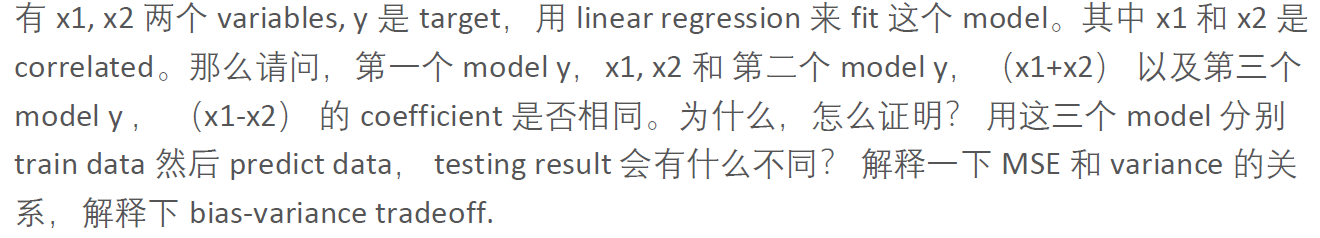

* https://stats.stackexchange.com/questions/83172/generate-two-variables-with-precise-pre-specified-correlation

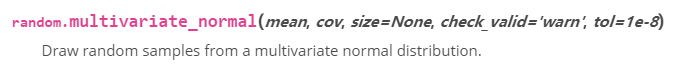

* https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

* 

In [2]:
nsample = 500
r = 0.9

# Generate pearson correlated data with approximately cor(X, Y) = r
import numpy as np
data = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], size=nsample)
x1, x2 = data[:,0], data[:,1]

data.shape
# That's it! Now let's take a look at the actual correlation:
# import scipy.stats as stats
# print('r=', stats.pearsonr(x1, x2)[0])

(500, 2)

In [3]:
x12_sum = x1 + x2
x12_diff = x1 - x2
e = np.random.normal(size=nsample)

y = 0.7*x1 + 0.3*x2 + 5 + e

In [4]:
import statsmodels.api as sm

X = np.column_stack((x1, x2))
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     243.6
Date:                Sun, 04 Jul 2021   Prob (F-statistic):           1.83e-74
Time:                        11:35:36   Log-Likelihood:                -713.57
No. Observations:                 500   AIC:                             1433.
Df Residuals:                     497   BIC:                             1446.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9279      0.045    108.773      0.0

In [5]:
import statsmodels.api as sm

X = np.column_stack((x12_sum, x12_diff))
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     243.6
Date:                Sun, 04 Jul 2021   Prob (F-statistic):           1.83e-74
Time:                        11:35:36   Log-Likelihood:                -713.57
No. Observations:                 500   AIC:                             1433.
Df Residuals:                     497   BIC:                             1446.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9279      0.045    108.773      0.0

### Coding. 生成 1000*2 矩阵: 第一列是按一定概率分布的categorical variables，第二列是正态分布的随机数。然后去除所有第二列小于1的行，再把第二列的数按第一列的categorical variable分类做归一化。不涉及算法


* Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.


* Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.


* However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.


In [6]:
data={
    'a':np.random.binomial(1,0.2,1000),
    'b':np.random.normal(0,1,1000)
}
# Or use np.random.choice(3,10,[0.1,0.2,0.7])
df=pd.DataFrame(data=data)
df=df.loc[df.b>=1].reset_index(drop=True)
df.head()

,a,b
0,0,1.165406
1,0,1.698780
2,0,1.750172
3,0,2.089677
4,1,1.202657


In [7]:
# Normalization: rescale to range of [0,1]
df.groupby('a').transform(lambda x: (x-x.min())/(x.max()-x.min()))

# Standardization: rescale to have mean=0 and std=1
df.groupby('a').transform(lambda x: (x-x.mean())/x.std())

df.head()

,a,b
0,0,1.165406
1,0,1.698780
2,0,1.750172
3,0,2.089677
4,1,1.202657


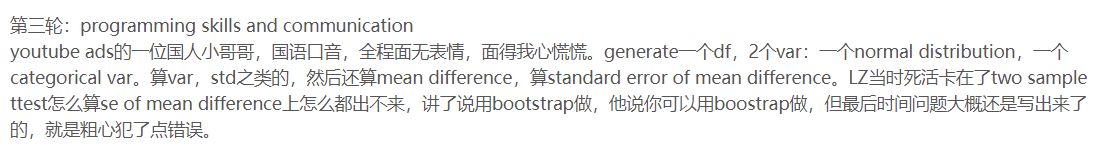


#### std: standard deviation = np.sqrt(variance)$

#### se: standard error = std / sqrt(n)

In [8]:
df.var()

a    0.195788
b    0.227806
dtype: float64

In [9]:
df.std()

a    0.44248
b    0.47729
dtype: float64